<a href="https://colab.research.google.com/github/Niashr/GoogleColab/blob/master/Copy_of_YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clone darknet repo/
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14370, done.
remote: Total 14370 (delta 0), reused 0 (delta 0), pack-reused 14370
Receiving objects: 100% (14370/14370), 13.08 MiB | 10.87 MiB/s, done.
Resolving deltas: 100% (9768/9768), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
pwd

'/content/darknet'

In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'AI ML interview Prep'
'An Energy and GPU-Computation Efficient Backbone Network.pdf'
'An improved object detection algorithm based on multi‑scaled and deformable convolutional neural networks.pdf'
'A Robust Real-Time Automatic License Plate Recognition Based on the YOLO Detector.pdf'
'Ashrin Nida (1).jpg'
'ASHRIN NIDA_DOT NET_6yrs Exp_Resume.doc'
'ASHRIN NIDA_DOT NET_6yrs Exp_Resume.gdoc'
'Ashrin Nida.jpg'
'AshrinNida - Monthly Break Up.pdf'
 Clear
'Colab Notebooks'
'DataScience Questions.gdoc'
'Fast Deep Neural Networks with Knowledge Guided Training and Predicted Regions of Interests for Realtime obj detection.pdf'
'Fast YOLO A Fast You Only Look Once System for Real-time Embedded Object Detection in Video.pdf'
'Final Thesis.pptx'
'IIIT Docs.rar'
 image-10.jpeg
 image-11.jpeg
 image-12.jpeg
 image-13.jpeg
 image-14.jpeg
 image-15.jpeg
 image-16.jpeg
 image-17.jpeg
 image-18.jpeg
 image-19.jpeg
 image-1.jpeg
 image-20.jpeg
 image-21.jpeg
 image-22.jpeg
 image-23.jpeg
 image-24.jpeg
 

In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

 backup			 obj.data	 results_55.avi
'Copy of YOLOv3.ipynb'	 obj.names	 test.mp4
 darknet53.conv.74	 obj.zip	 test.txt
 frame6.jpg		 old		 test-yolov3-labeled.cfg
 Full_8000		 results_1.avi	 train.txt
 generate_train.py	 results_2.avi	 yolov3-labeled.cfg
 NewSet			 results_3.avi


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
pwd

'/content'

In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
pwd

'/content/darknet'

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/frame0_jpg.rf.25dfcaade3fd12ee31406cfff13cf472.jpg  
  inflating: data/obj/frame0_jpg.rf.25dfcaade3fd12ee31406cfff13cf472.txt  
  inflating: data/obj/frame1_jpg.rf.41ffb0d2f7e434975c2c1ed5996eac9c.jpg  
  inflating: data/obj/frame1_jpg.rf.41ffb0d2f7e434975c2c1ed5996eac9c.txt  
  inflating: data/obj/frame10_jpg.rf.d89c94013de158fd302b5f383a62ea35.jpg  
  inflating: data/obj/frame10_jpg.rf.d89c94013de158fd302b5f383a62ea35.txt  
  inflating: data/obj/frame11_jpg.rf.be69c64ff1066d0a0cf618848d3bd5de.jpg  
  inflating: data/obj/frame11_jpg.rf.be69c64ff1066d0a0cf618848d3bd5de.txt  
  inflating: data/obj/frame12_jpg.rf.f98ab44f1e3a575fcd75dfda67dcfb51.jpg  
  inflating: data/obj/frame12_jpg.rf.f98ab44f1e3a575fcd75dfda67dcfb51.txt  
  inflating: data/obj/frame13_jpg.rf.968d76752b9110bb45b7330290355089.jpg  
  inflating: data/obj/frame13_jpg.rf.968d76752b9110bb45b7330290355089.txt  
  inflating: data/obj/frame14_jpg.rf.70ddddc2bbd17c092343b790e08bf4d5.j

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/test-yolov3-labeled.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [ ]:
pwd

'/content/darknet'

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data
!cp /mydrive/yolov3/test.txt  ./data
!cp /mydrive/yolov3/train.txt  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
# !cp /mydrive/yolov3/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


In [ ]:
# !python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     test.txt
coco.names  goal.txt	 labels			   openimages.names  train.txt
dog.jpg     horses.jpg	 obj			   person.jpg	     voc.names


In [ ]:
# upload pretrained convolutional layer weights
# !wget http://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
!nvidia-smi

Thu Nov  5 15:52:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ls /mydrive/yolov3/Full_8000

'charts&logs-20201105T155516Z-001.zip'	 test-yolov3-labeled_6000.weights
 obj.names				 test-yolov3-labeled_7000.weights
 test-yolov3-labeled_1000.weights	 test-yolov3-labeled_8000.weights
 test-yolov3-labeled_2000.weights	 test-yolov3-labeled_best.weights
 test-yolov3-labeled_3000.weights	 test-yolov3-labeled_final.weights
 test-yolov3-labeled_4000.weights	 test-yolov3-labeled_last.weights
 test-yolov3-labeled_5000.weights


In [ ]:
!./darknet detector map data/obj.data cfg/test-yolov3-labeled.cfg /mydrive/yolov3/Full_8000/test-yolov3-labeled_1000.weights -dont_show

In [ ]:
!./darknet detector map data/obj.data cfg/test-yolov3-labeled.cfg /mydrive/yolov3/Full_8000/test-yolov3-labeled_2000.weights -dont_show

In [ ]:
!./darknet detector map data/obj.data cfg/test-yolov3-labeled.cfg /mydrive/yolov3/Full_8000/test-yolov3-labeled_3000.weights -dont_show

In [ ]:
!./darknet detector map data/obj.data cfg/test-yolov3-labeled.cfg /mydrive/yolov3/Full_8000/test-yolov3-labeled_4000.weights -dont_show

In [ ]:
!./darknet detector map data/obj.data cfg/test-yolov3-labeled.cfg /mydrive/yolov3/Full_8000/test-yolov3-labeled_5000.weights -dont_show

In [ ]:
!./darknet detector map data/obj.data cfg/test-yolov3-labeled.cfg /mydrive/yolov3/Full_8000/test-yolov3-labeled_6000.weights -dont_show

In [ ]:
!./darknet detector map data/obj.data cfg/test-yolov3-labeled.cfg /mydrive/yolov3/Full_8000/test-yolov3-labeled_7000.weights -dont_show

In [ ]:
!./darknet detector map data/obj.data cfg/test-yolov3-labeled.cfg /mydrive/yolov3/Full_8000/test-yolov3-labeled_8000.weights -dont_show

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/test-yolov3-labeled.cfg /mydrive/yolov3/backup/test-yolov3-labeled_last.weights -map -dont_show

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

In [ ]:
imShow('chart.png')

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

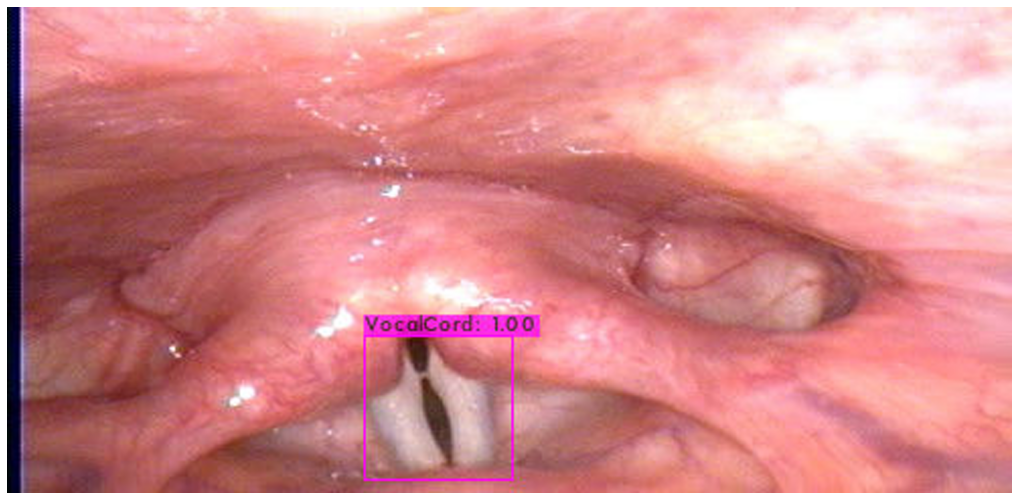

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/test-yolov3-labeled.cfg /mydrive/yolov3/Full_8000/test-yolov3-labeled_last.weights /mydrive/yolov3/frame6.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
!ls /mydrive/yolov3/test.mp4

/mydrive/yolov3/test.mp4


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector demo data/obj.data cfg/test-yolov3-labeled.cfg /mydrive/yolov3/Full_8000/test-yolov3-labeled_last.weights -dont_show /mydrive/yolov3/test.mp4 -i 0 -out_filename /mydrive/yolov3/results_6.avi -thresh 0.7

Streaming output truncated to the last 5000 lines.
VocalCord: 97% 

FPS:109.1 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 97% 

FPS:109.6 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 97% 

FPS:108.9 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 97% 

FPS:108.7 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 97% 

FPS:109.1 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 97% 

FPS:108.4 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 98% 

FPS:108.8 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 98% 

FPS:108.2 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 97% 

FPS:108.9 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 96% 

FPS:106.6 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 97% 

FPS:106.7 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 98% 

FPS:107.0 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 99% 

FPS:107.2 	 AVG_FPS:108.1

 cvWriteFrame 
Objects:

VocalCord: 99% 

FPS:107.0 	 AVG_FPS:108.1

 cvWrite